# Data Analysis of both neighborhood venues and clustering

In [1]:
import pandas as pd
import numpy as np

import sklearn
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt
print('Libraries imported!')

Libraries imported!


In [2]:
NY_grouped=pd.read_csv('NY_grouped.csv')
T_grouped=pd.read_csv('Toronto_grouped.csv')

### Merging New York and Toronto Neighborhood vs Venues datasets

In [3]:
L1=list(NY_grouped.columns)
L2=list(T_grouped.columns)
L=list(set(L1).intersection(L2))

df=pd.merge(NY_grouped,T_grouped, on=L, how='outer')
cols=[col for col in df.columns if col not in L]
df=df.drop(cols, axis=1)
df.head(20)

,Neighborhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,Annadale,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,Arden Heights,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,Arlington,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,Arrochar,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.050000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,Arverne,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.055556,0.0,0.000000,0.000000
6,Astoria,0.000000,0.0,0.0,0.010000,0.0,0.0,0.0,0.000000,0.000000,...,0.01,0.000000,0.0,0.000000,0.0,0.000000,0.010000,0.0,0.000000,0.000000
7,Astoria Heights,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
8,Auburndale,0.000000,0.0,0.0,0.052632,0.0,0.0,0.0,0.000000,0.052632,...,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
9,Bath Beach,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.020000,0.000000,...,0.00,0.020000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


### Using PCA for Dimensions Reduction without retaining the variance of the data

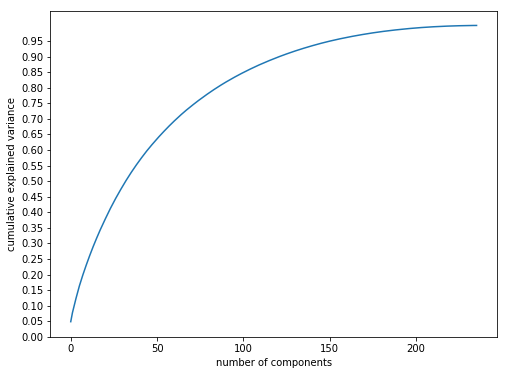

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
neigh_name = df['Neighborhood']
df_grouped_clustering = df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
# plt.xticks(np.arange(0, 450, step=30))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [5]:
pca = PCA(n_components=175)
dataset = pca.fit_transform(data_rescaled) 

### Clustering Neighborhoods based on Nearby Venues using KMeans

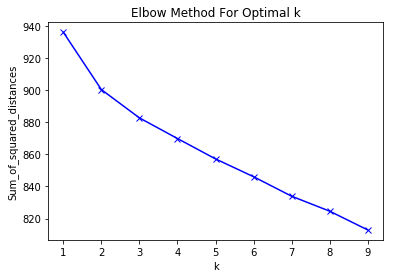

In [6]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1, 10)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Used Silhoutte Method to find the optimal number of clusters K.

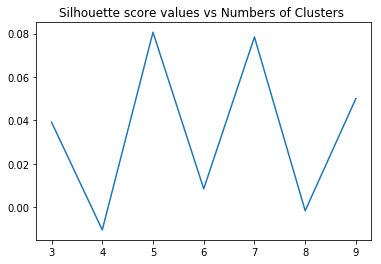

Optimal number of components is:
5


In [7]:
from sklearn.metrics import silhouette_score
obs = dataset.copy() 
# obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()
 
NumberOfClusters=range(3,10)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
#     print("Number Of Clusters:")
#     print(i)
#     print("Silhouette score value")
#     print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)


In [11]:
from sklearn.metrics import silhouette_samples
for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(obs)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(obs, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

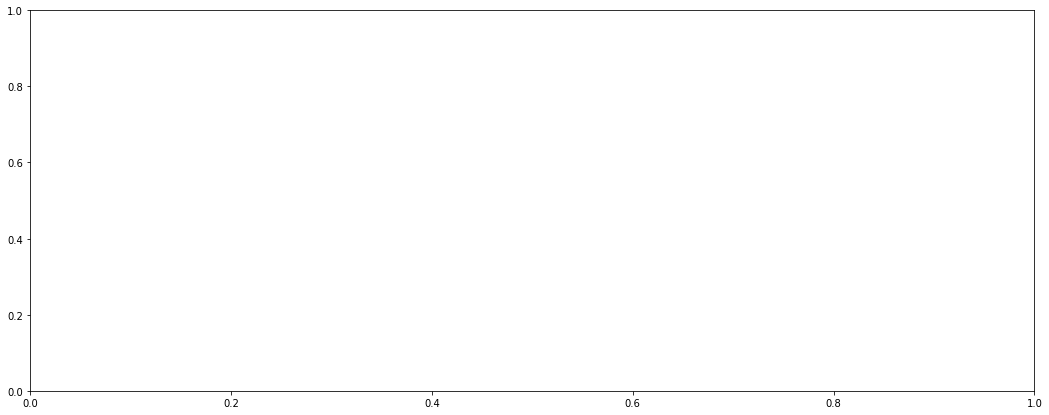

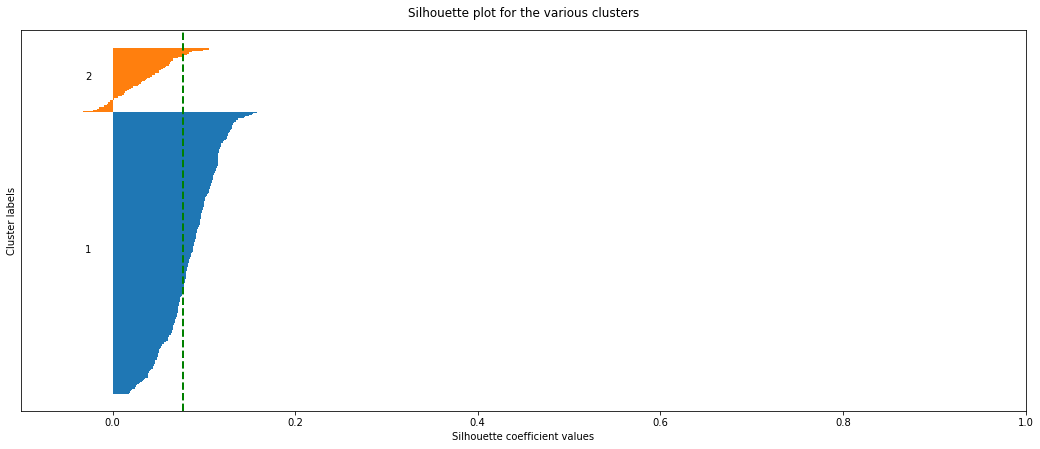

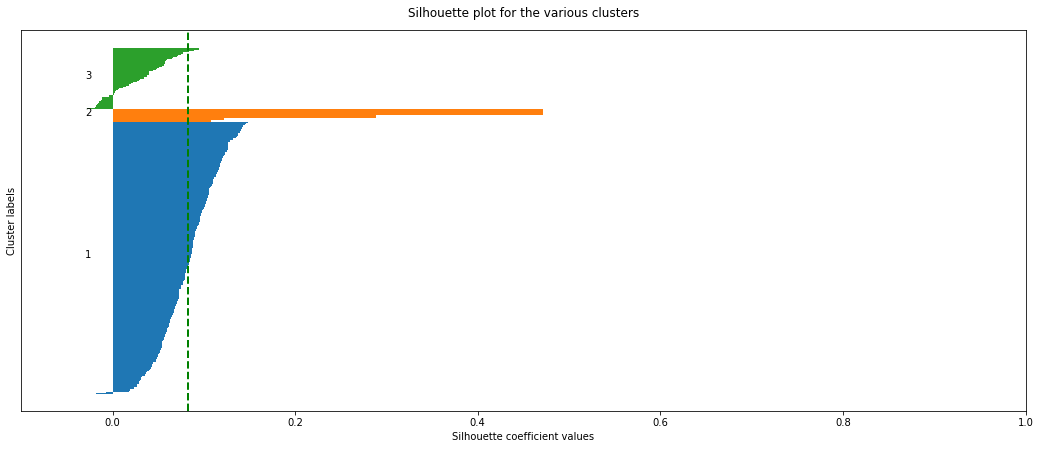

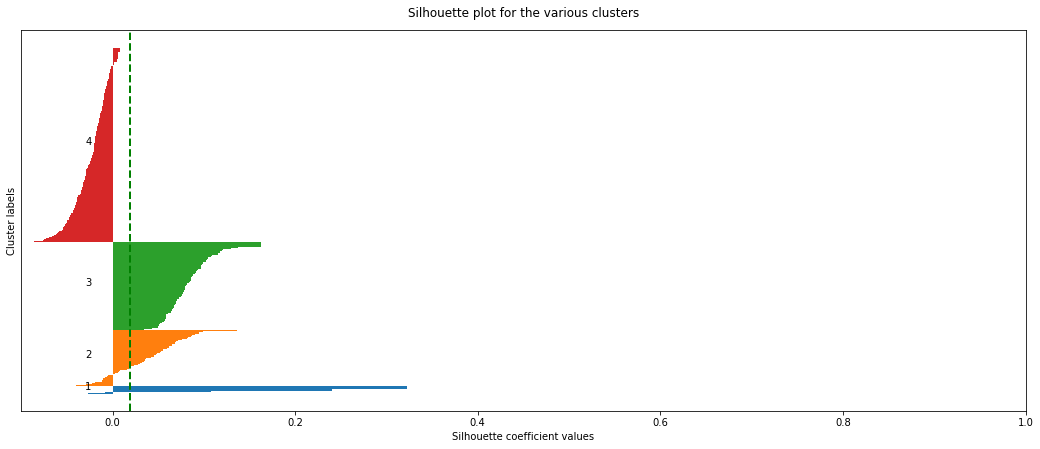

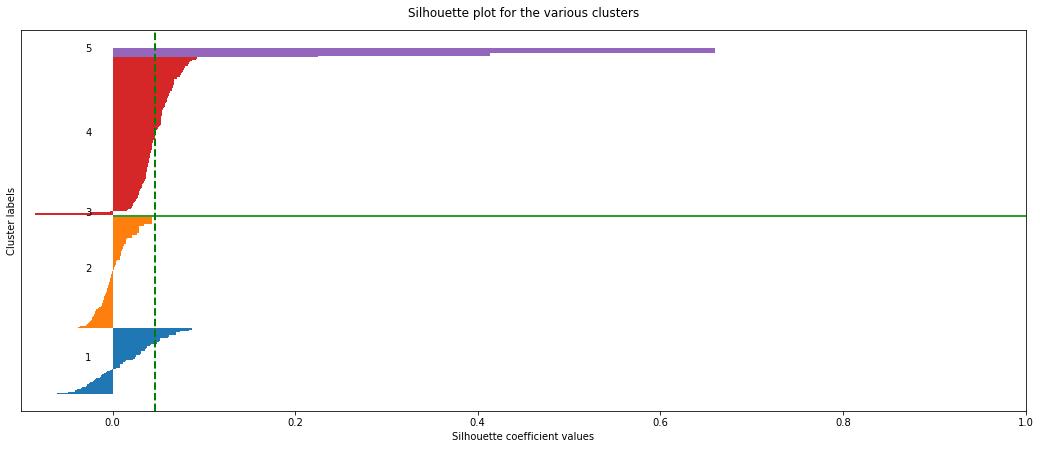

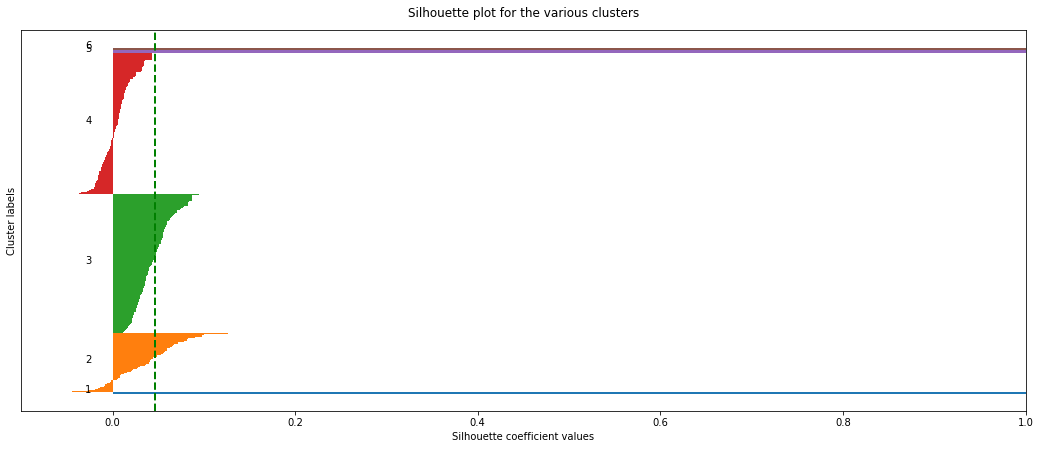

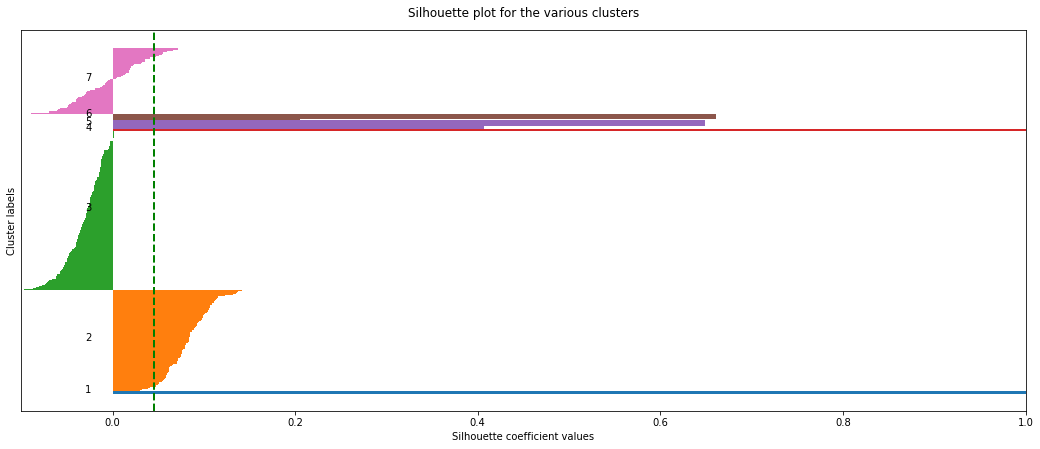

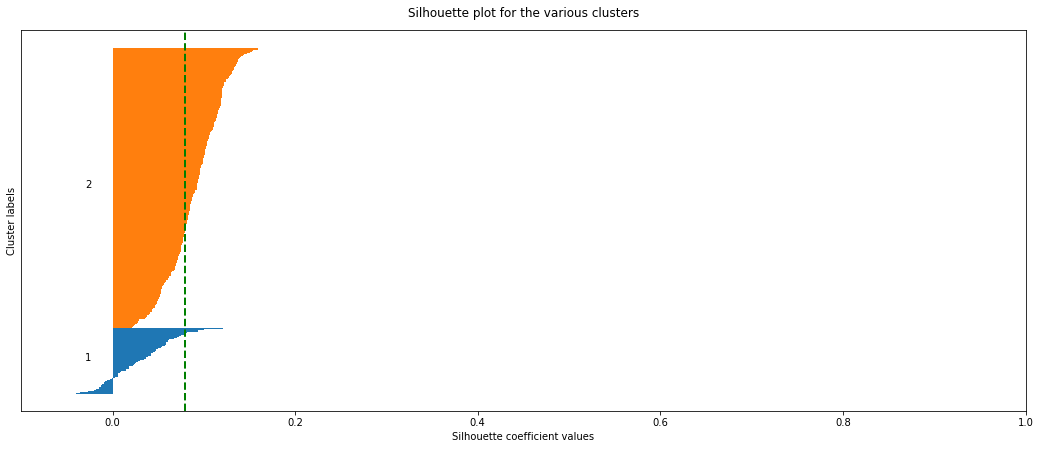

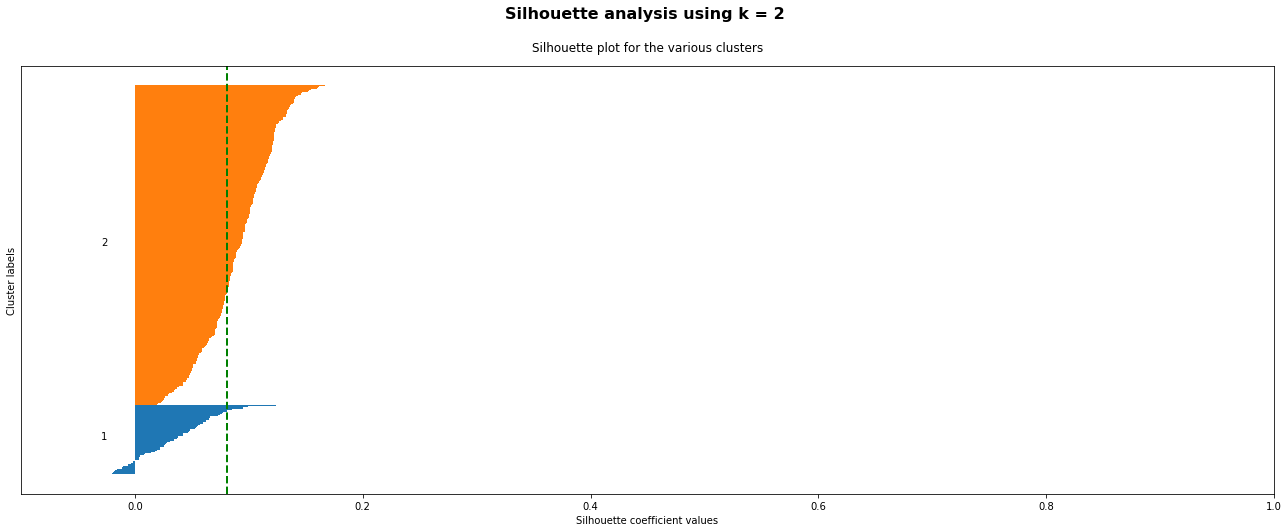

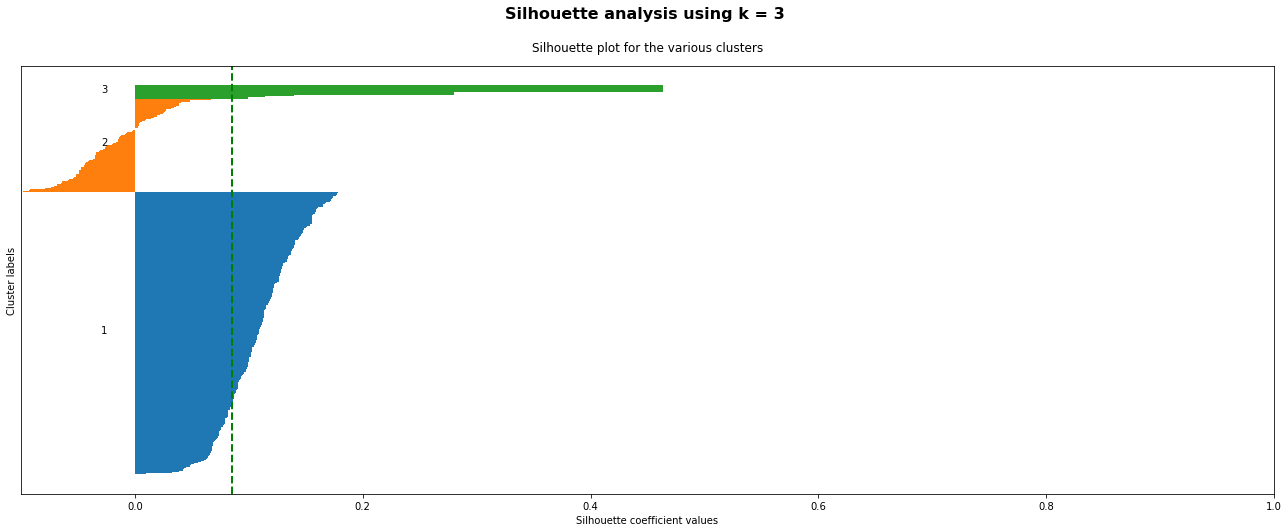

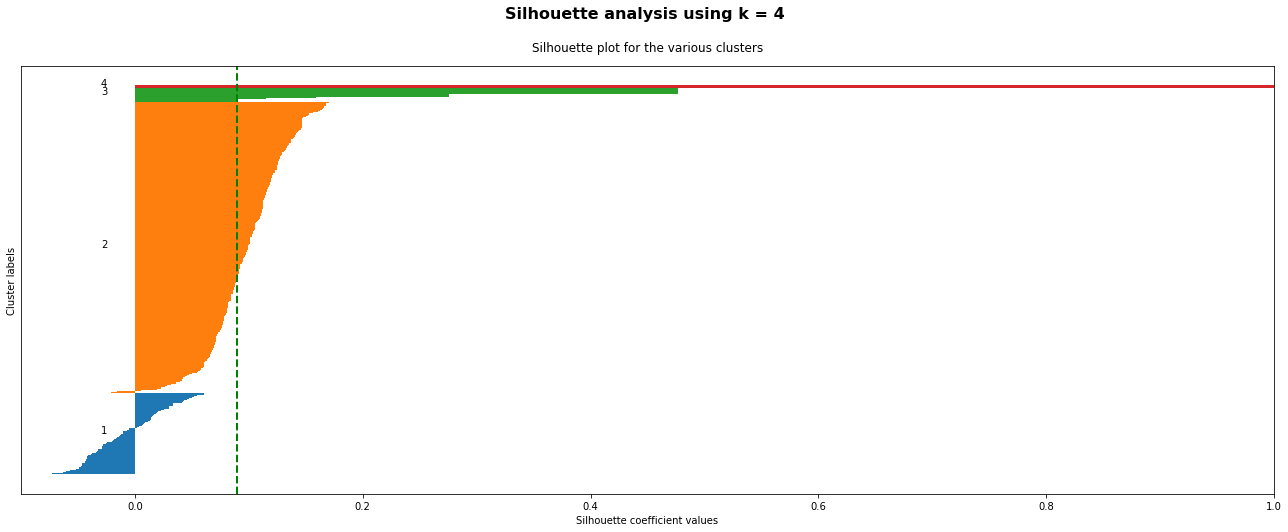

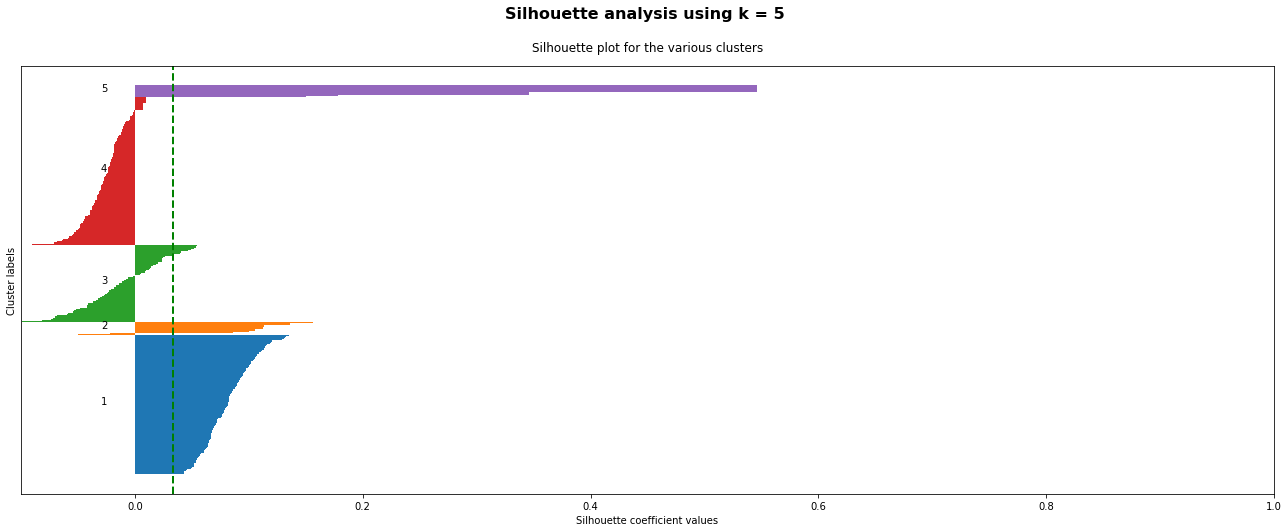

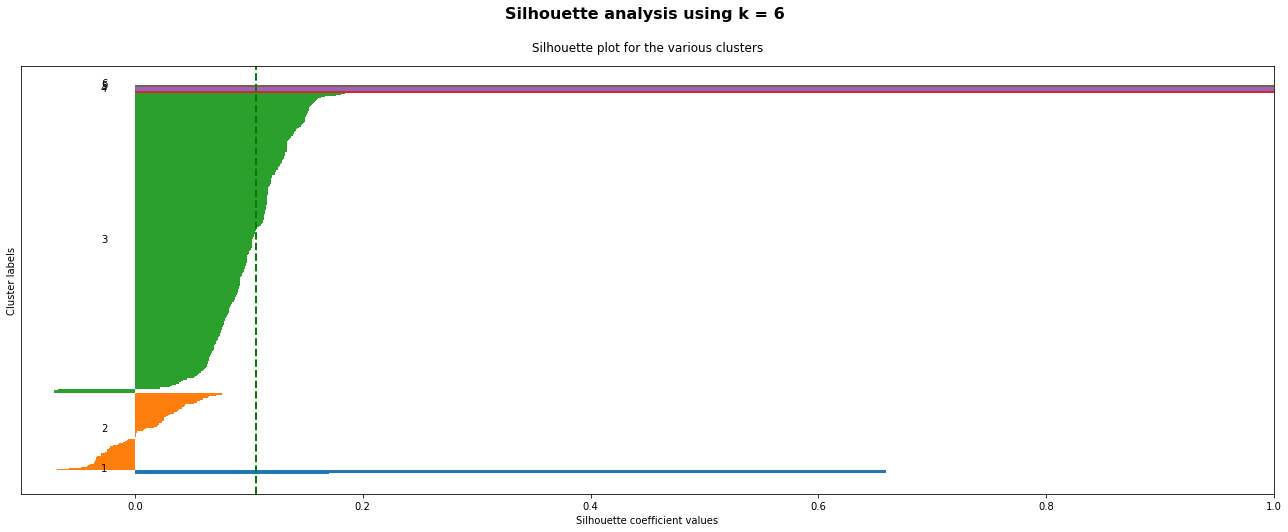

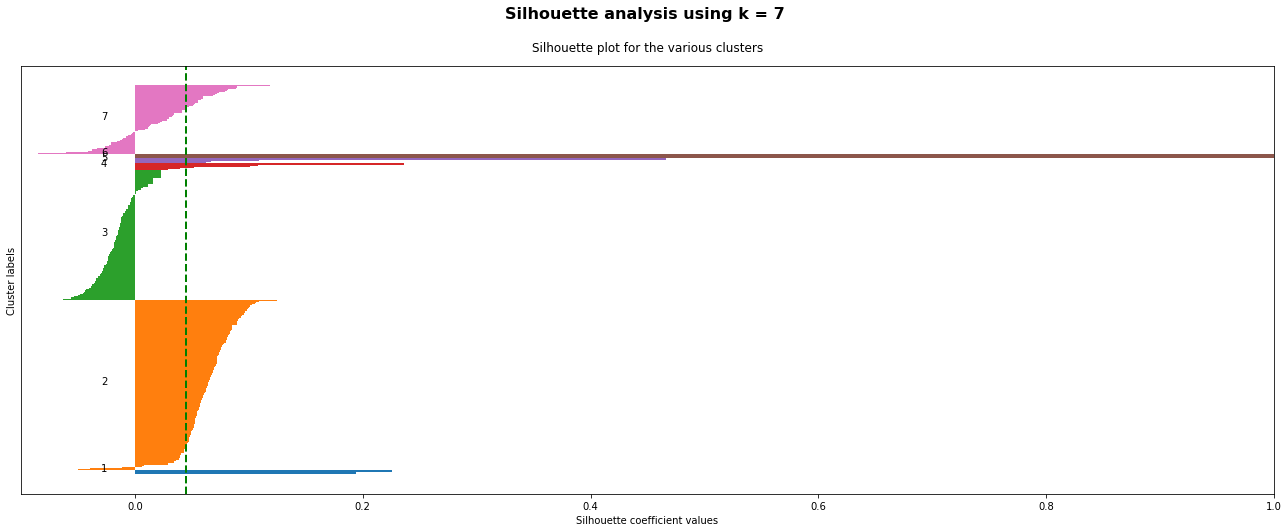

In [12]:
plt.show()

### To understand and extract the top 5 venues in NYC and Toronto

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df['Neighborhood']

for ind in np.arange(df.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Bus Station,Chinese Restaurant,Supermarket
1,Annadale,Pizza Place,Dance Studio,Sports Bar,Food,Sushi Restaurant
2,Arden Heights,Pizza Place,Coffee Shop,Bus Stop,Pharmacy,Coworking Space
3,Arlington,Bus Stop,Intersection,American Restaurant,Deli / Bodega,Yoga Studio
4,Arrochar,Bus Stop,Deli / Bodega,Italian Restaurant,Bagel Shop,Middle Eastern Restaurant


In [16]:
df_grouped_clustering = dataset.copy()
df_grouped_clustering

array([[ -3.02014503e-01,   5.60146926e-02,  -7.61902718e-02, ...,
         -5.92942833e-03,  -8.78930870e-04,  -8.31086669e-03],
       [ -1.11515565e-01,  -5.81760590e-02,  -1.07339678e-01, ...,
         -1.51867562e-02,   3.95690690e-02,  -5.38564991e-02],
       [ -2.87222273e-01,   2.80714682e-01,  -1.21394714e-01, ...,
          2.04424213e-04,   9.68331925e-03,  -1.63652188e-02],
       ..., 
       [ -2.06364838e-01,  -1.83102207e-01,  -1.56903734e-02, ...,
          1.50604906e-02,  -5.83100240e-03,  -2.92100652e-02],
       [  1.84136599e-02,  -2.10290758e-01,  -1.02278223e-01, ...,
         -1.55504054e-03,   3.03351519e-02,   1.74340035e-03],
       [ -3.39566216e-02,   1.49496562e-01,  -6.56425029e-02, ...,
          2.05527204e-02,   6.88607929e-03,  -1.22525797e-02]])

In [17]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [18]:
df_grouped_with_cluster = df.copy()
df_grouped_with_cluster.insert(0, 'Cluster_Labels', kmeans.labels_)

In [19]:
df_grouped_with_cluster.head()

,Cluster_Labels,Neighborhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,4,Allerton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,Annadale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Arlington,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_with_cluster_and_neighborhood = df_grouped_with_cluster[['Cluster_Labels', 'Neighborhood']]

### Appending New York data and Toronto data with respective cluster labels

In [33]:
NY_data = pd.read_csv('NY_Neighborhood_Locations.csv')
Toronto_data = pd.read_csv('Toronto_Neighborhood_Locations.csv')
print('NY_data shape: ', NY_data.shape)
print('Toronto_data shape: ', Toronto_data.shape)

NY_data shape:  (306, 4)
Toronto_data shape:  (210, 5)


In [34]:
NY_data_merged = NY_data[['Neighborhood', 'Latitude', 'Longitude']]
NY_data_merged = NY_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [35]:
NY_data_merged.dropna(inplace = True)
NY_data_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Wakefield,40.894705,-73.847201,4.0
1,Co-op City,40.874294,-73.829939,4.0
2,Eastchester,40.887556,-73.827806,4.0
3,Fieldston,40.895437,-73.905643,1.0
4,Riverdale,40.890834,-73.912585,1.0


In [36]:
Toronto_data_merged = Toronto_data[['Neighborhood', 'Latitude', 'Longitude']]
Toronto_data_merged = Toronto_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Parkwoods,43.753259,-79.329656,1.0
1,Victoria Village,43.725882,-79.315572,4.0
2,Harbourfront,43.654260,-79.360636,3.0
3,Lawrence Heights,43.718518,-79.464763,0.0
4,Lawrence Manor,43.718518,-79.464763,0.0


In [37]:
Toronto_data_merged.dropna(inplace = True)
Toronto_data_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Parkwoods,43.753259,-79.329656,1.0
1,Victoria Village,43.725882,-79.315572,4.0
2,Harbourfront,43.654260,-79.360636,3.0
3,Lawrence Heights,43.718518,-79.464763,0.0
4,Lawrence Manor,43.718518,-79.464763,0.0


### Visualizing New York City clusters in Folium Map

In [38]:
address_NY = 'Manhattan, NY'

geolocator = Nominatim(user_agent="NY_explorer")
location = geolocator.geocode(address_NY)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of Detroit,MI are 40.7896239, -73.9598939.


In [39]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_NY_with_clusters = folium.Map(location=[latitude_NY, longitude_NY], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_data_merged['Latitude'], NY_data_merged['Longitude'], NY_data_merged['Neighborhood'], NY_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_NY_with_clusters)
       
map_NY_with_clusters

### Visualizing New York City clusters in Folium Map

In [40]:
address_can = 'East York, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address_can)
latitude_tor = location.latitude
longitude_tor = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude_tor, longitude_tor))

The geograpical coordinate of Detroit,MI are 43.699971000000005, -79.33251996261595.


In [41]:
# create map
map_Toronto_with_clusters = folium.Map(location=[latitude_tor, longitude_tor], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data_merged['Latitude'], Toronto_data_merged['Longitude'], Toronto_data_merged['Neighborhood'], Toronto_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Toronto_with_clusters)
       
map_Toronto_with_clusters